![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

## Análisis

### Season

Promedio de alquileres por temporada: Observamos que la temporada 3 (verano) tiene el promedio más alto de alquileres de bicicletas con aproximadamente 234 alquileres, seguido por la temporada 2 (primavera) con un promedio de 215 alquileres. La temporada 4 (otoño) tiene un promedio de alquileres de aproximadamente 199 y finalmente la temporada 1 (invierno) tiene el promedio más bajo con aproximadamente 116 alquileres.

Inferencias: Esto sugiere que las estaciones con mejor clima (verano y primavera) promueven un mayor uso de bicicletas en comparación con el invierno y  primavera, que podrían estar relacionada con condiciones climáticas menos favorables para andar en bicicleta como el frío.

### Hour

Promedio de alquileres por hora: La demanda de bicicletas varía significativamente a lo largo del día. Las horas pico de alquiler son las 17:00 (468 alquileres) y las 18:00 (431 alquileres), lo cual se alinea con las horas de salida del trabajo o colegio. Hay otro pico significativo a las 8:00 de la mañana (363 alquileres), probablemente relacionado con el traslado a lugares de trabajo o estudio.
Durante la noche y la madrugada la demanda disminuye drásticamente, siendo mínima entre las 3:00 y las 4:00 de la mañana con menos de 12 alquileres de media.

Inferencias: Estos patrones indican un uso intensivo de las bicicletas para el desplazamiento hacia y desde el trabajo y colegio, con una gran disminución durante la noche que continua descendiendo hasta la madrugada. En estas horas es probable que se prefiera un medio de transporte diferente quizás por motivos de seguridad.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

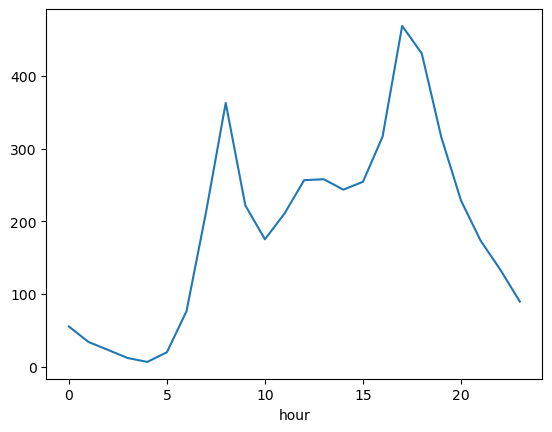

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

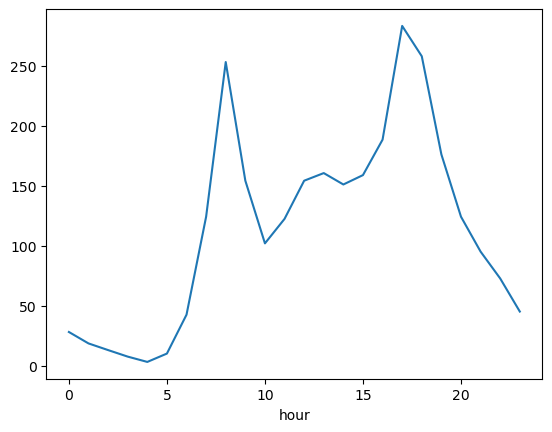

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour')['total'].mean().plot()

<Axes: xlabel='hour'>

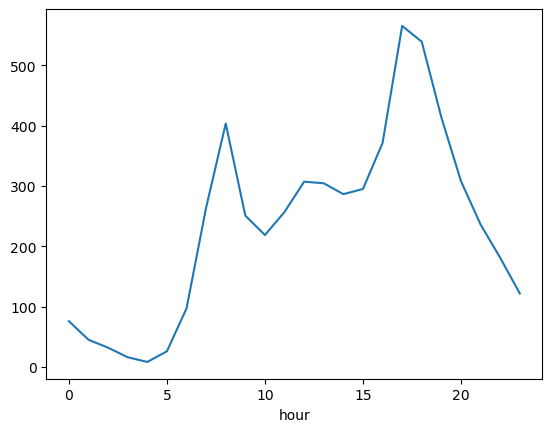

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot()

### Análsis

#### Rentas promedio para cada valor de la variable "hour"
El gráfico del comportamiento general muestra dos picos claros, uno durante la mañana alrededor de las 8:00 y otro más pronunciado en la tarde cerca de las 17:00 y 18:00. Esto indica que, independientemente de la temporada, las horas de mayor actividad de alquiler de bicicletas coinciden con los horarios habituales de entrada y salida del trabajo o colegio.

#### Season 1 (Invierno)

Alquiler en Invierno: Durante el invierno, el patrón de alquileres sigue siendo bimodal, con picos en las horas de la mañana y la tarde. Sin embargo, el número de rentas es considerablemente menor en comparación con el promedio anual, lo cual es esperable debido a las condiciones climáticas poco favorables para andar en bici. La disminución en la demanda puede ser más notable durante las primeras horas de la mañana y la tarde, posiblemente por las temperaturas más frías.

#### Season 3 (Verano)

Alquiler en Verano: En el verano, el patrón bimodal se mantiene y se acentúa con un incremento significativo en el número de alquileres, especialmente durante las tardes. Esto sugiere que las condiciones climáticas más cálidas y el aumento de las horas de sol fomentan el uso de bicicletas no solo para el desplazamiento laboral o académico sino también para actividades para otro tipo de actividades


#### Comparación y Conclusiones

La comparación directa entre invierno y verano revela que el clima tiene un papel crucial en la elección del transporte en bicicleta. Mientras que en invierno la actividad disminuye notablemente, en verano se observa un aumento en el uso de bicicletas, especialmente en horas de la tarde.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3
X = bikes[['season', 'hour']]
y = bikes['total']

bikes['season'] = pd.factorize(bikes.season)[0]

regresion= LinearRegression()
regresion.fit(X, y)

print(regresion.coef_)

[26.95130851 10.52129824]


Se calcula el error cuadrático medio y el $R^2$ para que estos puedan ser comparados con el resultado del punto 5

In [10]:
y_pred = regresion.predict(X)
r2 = r2_score(y, y_pred)
r2

0.1880588275971573

In [11]:
mse = mean_squared_error(y, y_pred)
mse

26640.03254457676

### Coeficientes

Por cada unidad incrementada en season (es decir por cada cambio de temporada) el total de alquileres de bicicletas aumenta en promedio 26.95 unidades, manteniendo la hora constante.

Por cada hora adicional en el día, el total de alquileres de bicicletas aumenta en promedio 10.52 unidades, manteniendo la estación constante.

### Limitaciones

La regresión lineal asume una relación lineal entre las variables independientes y la variable dependiente. Sin embargo, el efecto de la hora del día y la temporada en el alquiler de bicicletas puede no ser lineal.
 
La regresión lineal asume que las variables independientes son independientes entre sí. En la práctica, variables como la hora del día y la temporada pueden tener cierta dependencia

La manera en que se codifican las variables categóricas (season) puede afectar el modelo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

Debido a que el problema es de regresión y no de clasificación se reemplaza el gini index por la varianza.

In [12]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [13]:
def variance(y):
    if y.shape[0] == 0: 
        return 0
    else:
        return np.var(y)

def variance_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y[filter_l]
    y_r = y[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    var_y = variance(y)
    var_l = variance(y_l)
    var_r = variance(y_r)
    
    var_impurity_ = var_y - (n_l / (n_l + n_r) * var_l + n_r / (n_l + n_r) * var_r)
    
    return var_impurity_

def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:] 
        
        for split in splits:
            gain = variance_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10):
    if X.shape[0] == 1:
        return {'y_pred': y.iloc[0], 'level': level, 'split': -1, 'n_samples': 1, 'gain': 0}
    
    j, split, gain = best_split(X, y, num_pct)
    
    y_pred = y.mean()
    
    tree = {'y_pred': y_pred, 'level': level, 'split': -1, 'n_samples': X.shape[0], 'gain': gain}
    
    if gain < min_gain:
        return tree
    if max_depth is not None and level >= max_depth:
        return tree
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    
    tree['split'] = [j, split]
    
    tree['sl'] = tree_grow(X_l, y_l, level+1, min_gain, max_depth, num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level+1, min_gain, max_depth, num_pct)
    
    return tree

tree = tree_grow(X, y, max_depth=3, num_pct=1) 

tree


{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [1, 12.0],
 'n_samples': 10886,
 'gain': 5305.206789894921,
 'sl': {'y_pred': 118.34817140746213,
  'level': 1,
  'split': [1, 6.0],
  'n_samples': 5414,
  'gain': 8534.464286800661,
  'sl': {'y_pred': 25.177719821162444,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 2684,
   'gain': 191.404415430227,
   'sl': {'y_pred': 44.51045104510451,
    'level': 3,
    'split': -1,
    'n_samples': 909,
    'gain': 83.8462485738039},
   'sr': {'y_pred': 15.27718309859155,
    'level': 3,
    'split': -1,
    'n_samples': 1775,
    'gain': 8.300891246033473}},
  'sr': {'y_pred': 209.94871794871796,
   'level': 2,
   'split': [0, 3.0],
   'n_samples': 2730,
   'gain': 797.2761199456363,
   'sl': {'y_pred': 181.65051395007342,
    'level': 3,
    'split': -1,
    'n_samples': 1362,
    'gain': 2318.5945483463584},
   'sr': {'y_pred': 238.12280701754386,
    'level': 3,
    'split': -1,
    'n_samples': 1368,
    'gain': 105.78302939367495

In [14]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [15]:
tree_predict(X, tree)

array([ 44.51045105,  44.51045105,  15.2771831 , ..., 132.15204678,
       132.15204678, 132.15204678])

El numero de nodos finales resultante fue  de 15.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [16]:
max_depth_range = range(1, 8)

r2_scores = []

for depth in max_depth_range:
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=1)
    r2_scores.append(cross_val_score(reg_tree, X, y, cv=15, scoring='r2').mean())


Text(0, 0.5, 'R2')

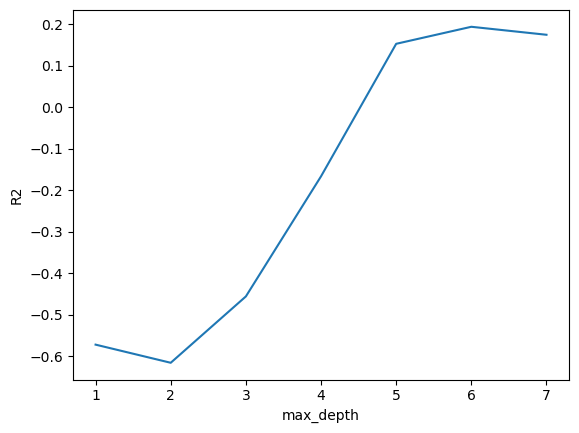

In [17]:
# Gráfica max_depth versus RMSE (error del modelo)
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2_scores)
plt.xlabel('max_depth')
plt.ylabel('R2')

In [18]:
sorted(zip(r2_scores, max_depth_range))[::-1][0]

(0.19329368264289337, 6)

In [19]:
reg_tree = DecisionTreeRegressor(max_depth=6, random_state=1)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [20]:
y_pred = reg_tree.predict(X)

r2 = r2_score(y, y_pred)
r2

0.599672990584702

In [21]:
mse = mean_squared_error(y, y_pred)
mse

13134.848831148256

### Análisis

Teniendo en cuenta los resultados de $R^2$=0.1880588275971573 y MSE=26640.03254457676 obtenidos en el punto 3, se puede ver que este modelo mejoró la predicción, esto se debe a que se realizó la validación cruzada (datos de train y test) y se eligió la max_depth que daba los mejores resultados, por lo que se obtuvo $R^2$=0.599672990584702 y MSE=13134.848831148256. Además de esto, se utilizó un modelo más robusto, por lo que el mejor desempeño en el árbol sobre la regresión lineal es el resultado esperado


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [22]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [23]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [24]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [25]:
# Celda 6

# Se quiere calibrar el parametro max_depth
parameters = {'max_depth': range(1, 20)}
dt = DecisionTreeClassifier(random_state=1)
clf_dt = GridSearchCV(dt, parameters, scoring='f1', cv=5)
clf_dt.fit(X_train, y_train)

# Mejor parámetro y mejor score de F1 para arbol
best_param_dt = clf_dt.best_params_
best_score_dt = clf_dt.best_score_

dt_optimized = DecisionTreeClassifier(**best_param_dt, random_state=1)
dt_optimized.fit(X_train, y_train)
y_pred_dt = dt_optimized.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Regresión logística
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"\nMejor parametro = {best_param_dt} ")

print(f"\nResultados árbol de desición: Accuracy árbol de desición = {accuracy_dt:.3f}, F1 árbol de desición = {f1_dt:.3f}")

print(f"\nResultados regresión logística: Accuracy regresión logística = {accuracy_lr:.3f}, F1 regresión logística = {f1_lr:.3f}")




Mejor parametro = {'max_depth': 4} 

Resultados árbol de desición: Accuracy árbol de desición = 0.651, F1 árbol de desición = 0.635

Resultados regresión logística: Accuracy regresión logística = 0.624, F1 regresión logística = 0.610


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [26]:
# Celda 7
dt1 = DecisionTreeClassifier(max_depth=4)
dt2 = DecisionTreeClassifier(min_samples_leaf=50)
lr = LogisticRegression(max_iter=5000)

# bagging
bagged_dt1 = BaggingClassifier(base_estimator=dt1, n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True)
bagged_dt2 = BaggingClassifier(base_estimator=dt2, n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True)
bagged_lr = BaggingClassifier(base_estimator=lr, n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True)

models = [bagged_dt1, bagged_dt2, bagged_lr]

for model in models:
    model.fit(X_train, y_train)

# Evaluación individual
for i, model in enumerate(models, start=1):
    y_pred = model.predict(X_test)
    print(f"Modelo {i}: Accuracy = {accuracy_score(y_test, y_pred):.3f}, F1-Score = {f1_score(y_test, y_pred):.3f}")

predictions = np.array([model.predict(X_test) for model in models])
# Votacion mayoritaria
majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 0, predictions)

# Evaluación ensamble
ensemble_accuracy = accuracy_score(y_test, majority_vote)
ensemble_f1 = f1_score(y_test, majority_vote)

print(f"Ensamble: Accuracy = {ensemble_accuracy:.3f}, F1-Score = {ensemble_f1:.3f}")


Modelo 1: Accuracy = 0.646, F1-Score = 0.642
Modelo 2: Accuracy = 0.672, F1-Score = 0.671
Modelo 3: Accuracy = 0.624, F1-Score = 0.611
Ensamble: Accuracy = 0.655, F1-Score = 0.651


### Comparación de resultados

Como se puede ver en los resultados el ensamble presentó un mejor acuracy que los modelos 1 y 3 pero uno mejor al modelo 2, esto se puede deber a que los modelos no son lo suficientemente diversos entre si o al bajo rendimiento del modelo 3 en comparación a los demás

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

Regresiones logisticas

In [27]:
errors = np.zeros(bagged_lr.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], bagged_lr.n_estimators))

for i in range(bagged_lr.n_estimators):
    oob_sample = ~bagged_lr.estimators_samples_[i]
    y_pred_ = bagged_lr.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagged_lr.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.4).astype(np.int)

print(f"\nRegresión logística: Accuracy = {metrics.accuracy_score(y_pred, y_test):.3f}, F1 = {metrics.f1_score(y_pred, y_test):.3f}")


Regresión logística: Accuracy = 0.621, F1 = 0.618


Árboles de decisión donde min_samples_leaf tome un valor de su elección

In [28]:
errors = np.zeros(bagged_dt2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], bagged_dt2.n_estimators))

for i in range(bagged_dt2.n_estimators):
    oob_sample = ~bagged_dt2.estimators_samples_[i]
    y_pred_ = bagged_dt2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagged_dt2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.4).astype(np.int)

metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

print(f"\nArbol min_smaples_leaf: Accuracy = {metrics.accuracy_score(y_pred, y_test):.3f}, F1 = {metrics.f1_score(y_pred, y_test):.3f}")


Arbol min_smaples_leaf: Accuracy = 0.662, F1 = 0.690


Árboles de decisión donde max_depth tome un valor de su elección

In [29]:
errors = np.zeros(bagged_dt1.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], bagged_dt1.n_estimators))

for i in range(bagged_dt1.n_estimators):
    oob_sample = ~bagged_dt1.estimators_samples_[i]
    y_pred_ = bagged_dt1.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagged_dt1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.4).astype(np.int)

print(f"\nArbol max_depth: Accuracy = {metrics.accuracy_score(y_pred, y_test):.3f}, F1 = {metrics.f1_score(y_pred, y_test):.3f}")


Arbol max_depth: Accuracy = 0.654, F1 = 0.667


Ensamble

In [30]:
y_pred_all = np.zeros((X_test.shape[0], bagged_dt1.n_estimators + bagged_dt2.n_estimators + bagged_lr.n_estimators))

errors = np.zeros(bagged_dt1.n_estimators + bagged_dt2.n_estimators + bagged_lr.n_estimators)

index = 0
for clf in [bagged_dt1, bagged_dt2, bagged_lr]:
    for i in range(clf.n_estimators):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[index] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all[:, index] = clf.estimators_[i].predict(X_test)
        index += 1

alpha = (1 - errors) / (1 - errors).sum()

y_pred = (np.sum(y_pred_all * alpha, axis=1) >= 0.4).astype(np.int)


print(f"\nEnsamble: Accuracy = {metrics.accuracy_score(y_pred, y_test):.3f}, F1 = {metrics.f1_score(y_pred, y_test):.3f}")



Ensamble: Accuracy = 0.651, F1 = 0.662


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Comparación

Con base en los resultados obtenidos se pudo ver que el accuracy es mejor utilizando votación mayoritaria para los modelos prupuestos para el ejercicio. Los resultados ligeramente mejores en la votación mayoritaria se pueden deber a el correlacionamiento de los errores de los modelos individuales, de modo que la votación ponderada podría haberle dado peso a modelos menos eficientes. Mientras que en la votación mayoritaria el modelo de ensamble tuvo el segundo mejor accuracy en el punto 7, en el punto 8 el accuracy del ensamble fue superado por los modelos de árbol, haciendo al ensamble poco eficinte. Es por esto que en este caso específico se preferiría utilizar la votación mayoritaria, sin embargo las discrepancias de presición de los modelos no fueron muy grandes.

### Ventajas y desventajas

#### Votación Mayoritaria

Ventajas

Simplicidad: más fácil de implementar ya que todas las predicciones de los modelos se tratan con igual importancia.

Menos propenso a sobreajuste: la influencia de un modelo individual es limitafa.

Diversidad: Se puede usar con varios modelos y esto mejora el resultado

Desventajas

Mismo peso: Todos los modelos tienen el mismo peso incluso si alguno tiene una baja capacidad predictiva y afecta negativamente el resultado

Desiciones erroneas: Si la mayoría de los modelos están equivocados el ensamble se equivocará.

#### Votación Ponderada

Ventajas

Peso en las predicciones: Permite que las predicciones de modelos con mayor confianza o desempeño tengan más peso.

Flexibilidad: Ofrece la posibilidad de ajustar los pesos según criterios elegidos.


Desventajas

Complejidad: La implementación y la optimización de los pesos pueden ser más complejas y requerir un análisis más detallado.

Sobreajuste: Existe un riesgo mayor de sobreajuste

Dificultad: Determinar la mejor manera de asignar pesos no es del todo intuitivo, por lo que toca tener en cuenta cada caso